#Project13- To Perform Cross Validation and  Leave One Out Cross Validation (LOOCV) on California house dataset

In [26]:
#Importing some neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets


In [27]:
df_houses=datasets.fetch_california_housing()

In [28]:
df_houses.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [29]:
df_houses.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [30]:
x=pd.DataFrame(df_houses.data,columns=df_houses.feature_names)
y=pd.DataFrame(df_houses.target,columns=['Target'])

In [31]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [32]:
y.head()

,Target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [33]:
#Concating the data and target
houses=pd.concat([x,y],axis=1)
houses

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [34]:
#Checking data types of data
houses.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Target        float64
dtype: object

In [35]:
#Checking for null values
houses.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [36]:
#Checking description of data
houses.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


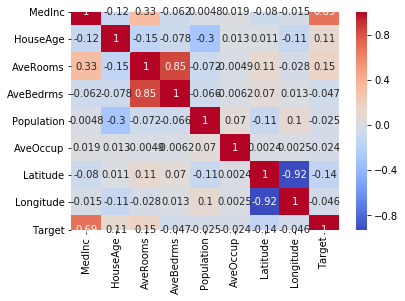

In [37]:
#Checking for correaltion using heatmap
sns.heatmap(houses.corr(),annot=True,cmap='coolwarm')
plt.show()

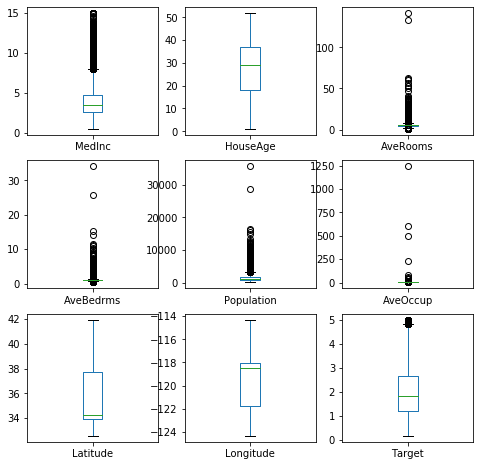

In [38]:
#Checking for outliers
houses.plot(kind='box',subplots=True,layout=(3,3),figsize=(8,8))
plt.show()

In [39]:
#Using Z score to remove outliers
from scipy.stats import zscore
z_score=np.abs(zscore(houses))
print(houses.shape)
thresold=3
new_houses=houses[(z_score<3).all(axis=1)]
new_houses.shape

(20640, 9)


(19794, 9)

In [40]:
#Separating output and input variables
df_x=new_houses.drop(columns=["Target"])
y=new_houses[["Target"]]

In [41]:
#lets check the skewness
df_x.skew()

MedInc        0.786048
HouseAge      0.046496
AveRooms      0.555865
AveBedrms     3.913734
Population    1.346151
AveOccup      5.789707
Latitude      0.460162
Longitude    -0.292814
dtype: float64

In [42]:
#Treating skewness
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.sqrt(df_x[index])

In [43]:
#lets again check the skewness
df_x.skew()

MedInc        0.245009
HouseAge      0.046496
AveRooms      0.036389
AveBedrms     2.976989
Population    0.386053
AveOccup      1.708367
Latitude      0.460162
Longitude    -0.292814
dtype: float64

In [44]:
#Lets bring all features to common scale as we are using linear regression
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)

--To lowerdown the error due to bias-variance trade off or due to underfit and overfit of model we use Validation technique--

**We perform holdout validation**, we split the data into a training and testing set. The training set will be what the model is created on and the testing data will be used to validate the generated model. Though there are (fairly easy) ways to do this using pandas methods, we can make use of scikit-learns “train_test_split” method to accomplish this.

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [47]:
#Checking R2 score by taking a small portion of data for validation
from sklearn.metrics import r2_score
from timeit import default_timer as timer
Start_hold_val = timer()
print("r2_score is: {}".format(r2_score(y_test,y_pred)))
End_hold_val = timer()
print("Time taken by hold out validation :{}".format(End_hold_val-Start_hold_val))

r2_score is: 0.6034805533610286
Time taken by hold out validation :0.0035754990000214093


**Now we perform cross validation**- cross validation technique divides the data sets into number of partitions/folds and perform operations on each partition and gives the resultant of r2 score 

K-fold validation is a popular method of cross validation which shuffles the data and splits it into k number of folds (groups). In general K-fold validation is performed by taking one group as the test data set, and the other k-1 groups as the training data, fitting and evaluating a model, and recording the chosen score. This process is then repeated with each fold (group) as the test data and all the scores averaged to obtain a more comprehensive model validation score.

Here we are giving K/CV=5

In [48]:
from sklearn.model_selection import cross_val_score

start_kfold = timer()
c_scores=cross_val_score(LinearRegression(),x,y,cv=5,scoring="r2")
print("mean r2 score: {}".format(c_scores.mean()))
print("std dev in r2 score: {}".format(c_scores.std()))
end_kfold = timer()
print(" r2 scores of each partition :{}".format(c_scores))
print("Time taken by K Fold validation :{}".format(end_kfold-start_kfold))

mean r2 score: 0.5646119203352136
std dev in r2 score: 0.052040080227763075
 r2 scores of each partition :[0.52226147 0.50241846 0.5889724  0.55958634 0.64982092]
Time taken by K Fold validation :0.0906401749999759


Now we perform **Leave One Out Cross Validation (LOOCV)** can be considered a type of K-Fold validation where k=n given n is the number of rows in the dataset. LOOCV is performed where dataset is small, also it takes a lot of time

In [49]:
start_loocv = timer()
c_scores=cross_val_score(LinearRegression(),x,y,cv=len(x),scoring="neg_mean_squared_error")
print("mean r2 score: {}".format(c_scores.mean()))
print("std dev in r2 score: {}".format(c_scores.std()))
end_loocv= timer()
print("scores :{}".format(c_scores))
print("Time taken by LOO cross validation :{}".format(end_loocv-start_loocv))

mean r2 score: -0.4650921822306346
std dev in r2 score: 1.0611260087165477
scores :[-0.29600354 -0.15831675 -0.00768318 ... -0.6008418  -0.17453211
 -0.09515539]
Time taken by LOO cross validation :334.9108134679999


In [50]:
x.shape

(19794, 8)

Ww can see that LOOCV takes so much time to execute becuase this have taken 19794 number of folds which is equalt to number of rows our data have